## Deep Learning based Bilingual lemmatizer for Urdu and Punjabi 

### Imports 

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, TimeDistributed,LSTM,Bidirectional

## Reading Data and splitting with ratio 8:2

In [2]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('urdu punjabi merged Dataset.csv')

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2)
print(len(train_set), len(test_set))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Extracting word and lemma from train set

In [3]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

## Initializing Tokenizer

In [4]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)
tokenizer.fit_on_texts(lemmas)

## Determining Vocabulary Size

In [5]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 54


## Displaying total vocabulary characters

In [6]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'ر': 5,
 'ک': 6,
 'ل': 7,
 'ھ': 8,
 'ت': 9,
 'د': 10,
 'م': 11,
 'س': 12,
 'ب': 13,
 'ں': 14,
 'پ': 15,
 'ٹ': 16,
 'چ': 17,
 'گ': 18,
 'ج': 19,
 'ہ': 20,
 'ے': 21,
 'ڑ': 22,
 'ئ': 23,
 'ڈ': 24,
 'ش': 25,
 'ف': 26,
 'ق': 27,
 'ُ': 28,
 'خ': 29,
 'ع': 30,
 'ح': 31,
 'ز': 32,
 'ص': 33,
 'ط': 34,
 'ِ': 35,
 'آ': 36,
 'غ': 37,
 'ؤ': 38,
 'ض': 39,
 'َ': 40,
 'ٗ': 41,
 'ث': 42,
 'ذ': 43,
 'ظ': 44,
 'ً': 45,
 'ٔ': 46,
 'ء': 47,
 'ٰ': 48,
 'ّ': 49,
 'ژ': 50,
 'ۓ': 51,
 'ؔ': 52,
 'ۃ': 53}

## Converting Words and Lemma in sequence of integers

In [7]:
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [8]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['سدھر', 'گوڈااں', 'سالیا', 'کاتنا', 'قرابتوں']
[[12, 10, 8, 5], [18, 2, 24, 1, 1, 14], [12, 1, 7, 3, 1], [6, 1, 9, 4, 1], [27, 5, 1, 13, 9, 2, 14]]
['سدھر', 'گوڈا', 'سالا', 'کات', 'قرابت']
[[12, 10, 8, 5], [18, 2, 24, 1], [12, 1, 7, 1], [6, 1, 9], [27, 5, 1, 13, 9]]


## Plot the word with max length and visualizing the count according to word length

اسلامآبادیوندیاں


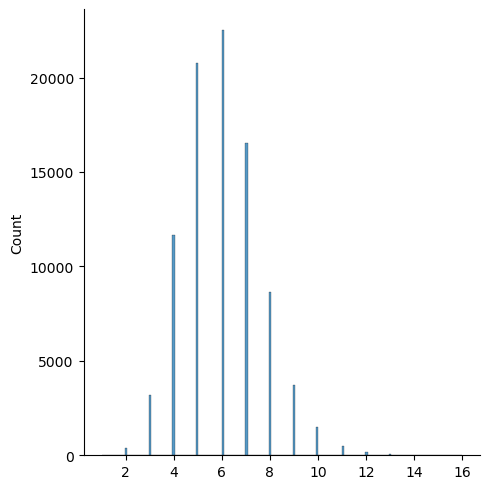

In [9]:
import seaborn as sns

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

## Displaying max size of word

In [10]:
max_len = max(len(seq) for seq in words_ints)
print('Maximum Sequence Length:', max_len)

Maximum Sequence Length: 16


## Applying Padding on the sequence of integers of each word to make it equal to length 15

In [11]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[12, 10,  8,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18,  2, 24,  1,  1, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12,  1,  7,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  1,  9,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [27,  5,  1, 13,  9,  2, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19,  8,  3,  5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [31, 33,  1,  5, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  7,  2,  1,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  8, 18,  2, 23,  3, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  1,  7, 26,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

## Applying Padding on the sequence of integers of each lemma to make it equal to length 15

In [12]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[12, 10,  8,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18,  2, 24,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12,  1,  7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  1,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [27,  5,  1, 13,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [19,  8,  3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [31, 33,  1,  5, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  7,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  8, 18,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  1,  7, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [13]:
X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')

In [14]:
print(X_train.shape)
print(y_train.shape)

(89660, 16)
(89660, 16)


## Defining Model sequqntial and then using BILSTM

In [15]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(units=64, return_sequences=True))) # BiLSTM layer
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))  # TimeDistributed for sequence prediction

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

## Training Model

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
561/561 [==============================] - 51s 80ms/step - loss: 0.6897 - accuracy: 0.8569 - val_loss: 0.1227 - val_accuracy: 0.9716
Epoch 2/20
561/561 [==============================] - 42s 75ms/step - loss: 0.0795 - accuracy: 0.9792 - val_loss: 0.0610 - val_accuracy: 0.9822
Epoch 3/20
561/561 [==============================] - 48s 86ms/step - loss: 0.0563 - accuracy: 0.9832 - val_loss: 0.0520 - val_accuracy: 0.9842
Epoch 4/20
561/561 [==============================] - 46s 82ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0476 - val_accuracy: 0.9850
Epoch 5/20
561/561 [==============================] - 49s 87ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0442 - val_accuracy: 0.9860
Epoch 6/20
561/561 [==============================] - 60s 107ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0411 - val_accuracy: 0.9869
Epoch 7/20
561/561 [==============================] - 52s 92ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0397 - val_accuracy

## Saving Model

In [17]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to a file
model.save('BiLSTM.h5')

C:\Users\PMLS\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Saving Tokenizer

In [18]:
# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Plotting Accuracy and Loss Curves

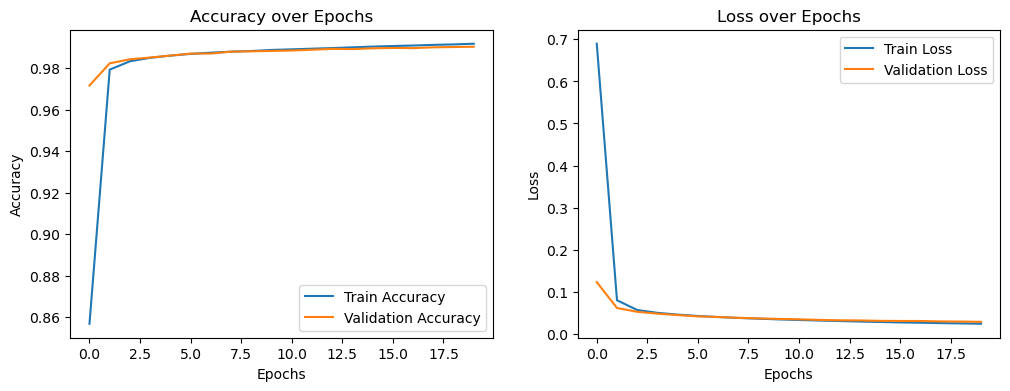

In [19]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## FInding Accuracy, percsion, recall and F1 Score

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prepare testing data
X_test_texts = [n for (n, l) in test_set]
Y_test_texts = [l for (n, l) in test_set]
X_test = np.array(pad_sequences(tokenizer.texts_to_sequences(X_test_texts), maxlen=max_len, padding='post')).astype('int32')
y_test = np.array(pad_sequences(tokenizer.texts_to_sequences(Y_test_texts), maxlen=max_len, padding='post')).astype('int32')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# Flatten the predictions and true labels for evaluation
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Filter out padding
mask = y_test_flat != 0
y_test_flat = y_test_flat[mask]
y_pred_flat = y_pred_flat[mask]

# Calculate metrics
precision = precision_score(y_test_flat, y_pred_flat, average='macro')
recall = recall_score(y_test_flat, y_pred_flat, average='macro')
f1 = f1_score(y_test_flat, y_pred_flat, average='macro')
accuracy = accuracy_score(y_test_flat, y_pred_flat)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

701/701 [==============================] - 16s 19ms/step
Precision: 0.9718424061651939
Recall: 0.9378788052194924
F1-score: 0.9520656659119765
Accuracy: 0.9748739978308487


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Defining predict_lemma function for lemma prediction

In [23]:
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

def predict_lemma(word):

  max_len=16
  
  # this is the saved tokenizer of bilstm model
  with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

  # Convert the word to a sequence of integers
  sequence = tokenizer.texts_to_sequences([word])

  # Pad the sequence to the maximum length
  padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')

  # this is the saved model file of bilstm model
  model = load_model('BiLSTM.h5')

  # Predict the lemma using the trained model
  predictions = model.predict(padded_sequence)

  # Convert the prediction to the corresponding lemma
  # Since the output is a sequence, we need to take the argmax for each timestep
  lemma_sequence = np.argmax(predictions, axis=-1)[0]

  # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
  lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])

  return lemma

## Performing Prediction

In [24]:
# Example usage (Actuall lemma = ڈھگا):
word = 'ڈھگائیں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for ڈھگائیں is: ڈھگا


In [25]:
# Example usage (Actuall lemma = ڈراونہ):
word = 'ڈراونہیو'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for ڈراونہیو is: ڈراونہ


In [26]:
# Example usage (Actuall lemma = 'تگڑا'):
word = 'تگڑادا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 2s 2s/step
The predicted lemma for تگڑادا is: تگڑا


In [27]:
word = 'ہونا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 2s 2s/step
The predicted lemma for ہونا is: ہو


In [28]:
word = 'جہانیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 2s 2s/step
The predicted lemma for جہانیاں is: جہانی


In [29]:
word = 'خانسامنوں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 2s 2s/step
The predicted lemma for خانسامنوں is: خانسامن


In [30]:
predicted_lemma = predict_lemma('جميعت')
print(f"The predicted lemma for 'جميعت' is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for 'جميعت' is: جمعت


In [31]:
# Example usage:
word = 'جھجکوں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 2s 2s/step
The predicted lemma for جھجکوں is: جھجک


In [32]:
word = 'پهنسوائیو'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 2s 2s/step
The predicted lemma for پهنسوائیو is: پنسوائی


In [33]:
# Example usage (Actuall lemma ='جھپٹوا'):
word = 'جھپٹواوندیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for جھپٹواوندیاں is: جھپٹوا


In [34]:
# Example usage (Actuall lemma ='کر'):
word = 'کرنا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for کرنا is: کر


In [35]:
# Example usage (Actuall lemma ='ودا'):
word = 'وداندیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for وداندیاں is: ودا


In [36]:
# Example usage (Actuall lemma ='چھڈوا'):
word = 'چھڈواوئیے'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 1s 1s/step
The predicted lemma for چھڈواوئیے is: چھڈوا


In [37]:
# Example usage (Actuall lemma ='چوندا'):
word = 'چوندهيانا'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 1s 1s/step
The predicted lemma for چوندهيانا is: چوندا


In [38]:
# Example usage (Actuall lemma ='مچوا'):
word = 'مچواندیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 1s/step
The predicted lemma for مچواندیاں is: مچوا


In [39]:
word = 'فلاںدیاں'
predicted_lemma = predict_lemma(word)
print(f"The predicted lemma for {word} is: {predicted_lemma}")


1/1 [==============================] - 1s 1s/step
The predicted lemma for فلاںدیاں is: فلاں
